# 参考
http://statmodeling.hatenablog.com/entry/how-to-use-GPy

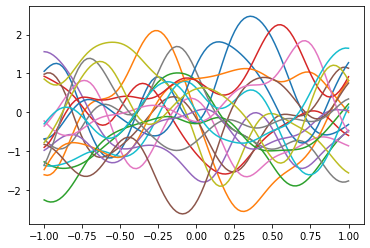

In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=0.2)

np.random.seed(seed=123)
N_sim = 100
x_sim = np.linspace(-1, 1, N_sim)
x_sim = x_sim[:, None]
mu = np.zeros(N_sim)
cov = kernel.K(x_sim, x_sim)
y_sim = np.random.multivariate_normal(mu, cov, size=20)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(20):
    ax.plot(x_sim[:], y_sim[i,:])

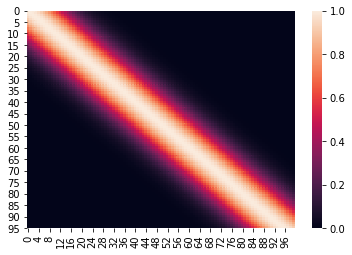

In [2]:
import seaborn as sns
sns.heatmap(cov)

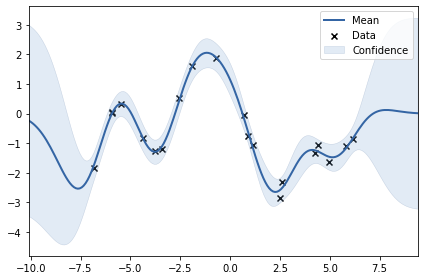

In [3]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(1)
# kernel = GPy.kern.RBF(1) + GPy.kern.Bias(1) + GPy.kern.Linear(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')
model = GPy.models.GPRegression(d.X[:, None], d.Y[:, None], kernel=kernel)
model.optimize()
model.plot()

## prediction
x_pred = np.linspace(-10, 10, 100)
x_pred = x_pred[:, None]
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))[0]

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i        f              |g|        
    00s02  000002   4.652804e+01   1.925502e+02 
    00s15  000010  -2.162688e+01   1.347702e+01 
    00s17  000011  -2.196792e+01   1.057922e+01    00s28  000022  -2.280788e+01   8.732315e-09 
Runtime:     00s28
Optimization status: Converged



 /usr/local/lib/python3.7/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


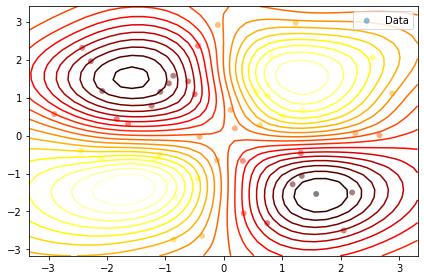

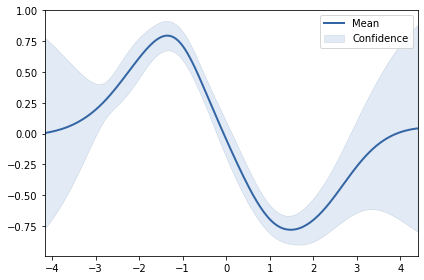

In [4]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.Matern52(2, ARD=True)

np.random.seed(seed=123)
N = 50
X = np.random.uniform(-3.,3.,(N, 2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2]) + np.random.randn(N,1)*0.05

model = GPy.models.GPRegression(X, Y, kernel)
model.optimize(messages=True, max_iters=1e5)
model.plot()

model.plot(fixed_inputs=[(0, -1.0)], plot_data=False)

## prediction
x_pred = np.array([np.linspace(-3, 3, 100), np.linspace(3, -3, 100)]).T
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))[0]

[[-28.8510499]] -17.915180302612242


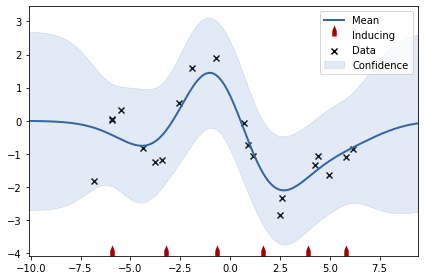

In [5]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')
m_full = GPy.models.GPRegression(d.X[:, None], d.Y[:, None], kernel=kernel)
m_full.optimize()

Z = np.hstack((np.linspace(-6, -3, 3), np.linspace(3, 6, 3)))[:,None]
# Z = np.linspace(-6, 6, 12)[:, None]
m_sparse = GPy.models.SparseGPRegression(d.X[:, None], d.Y[:, None], Z=Z)
m_sparse.optimize()
m_sparse.plot()
print(m_sparse.log_likelihood(), m_full.log_likelihood())

 /usr/local/lib/python3.7/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


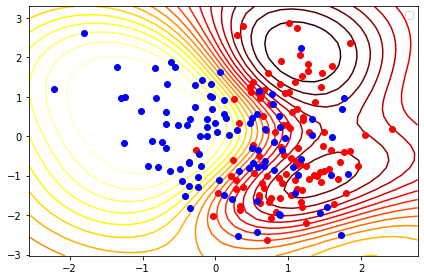

In [6]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(2, ARD=True)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-classification.txt')
model = GPy.models.GPClassification(d[['X1', 'X2']].values, d.Y[:, None])
model.optimize()

ax = model.plot(plot_data=False)
d0 = d[d.Y == 0]
d1 = d[d.Y == 1]
plt.plot(d0.X1, d0.X2, 'ro')
plt.plot(d1.X1, d1.X2, 'bo')

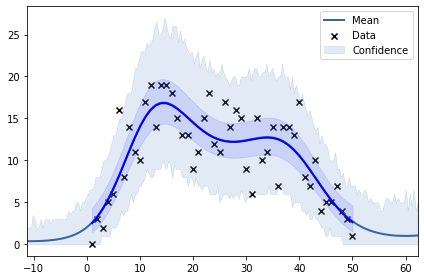

In [7]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-kubo11a.txt')

model = GPy.core.GP(X=np.linspace(1, 50, 50)[:,None], Y=d.Y[:,None], kernel=kernel,
    inference_method=GPy.inference.latent_function_inference.Laplace(),
    likelihood=GPy.likelihoods.Poisson())
model.optimize()
model.plot()

x_pred = np.linspace(1, 50, 50)[:, None]
f_mean, f_var = model._raw_predict(x_pred) # Predictive GP for log intensity mean and variance
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2.*np.sqrt(f_var)
plt.plot(x_pred, np.exp(f_mean), color='blue', lw=2)
plt.fill_between(x_pred[:,0], np.exp(f_lower[:,0]), np.exp(f_upper[:,0]), color='blue', alpha=.1)

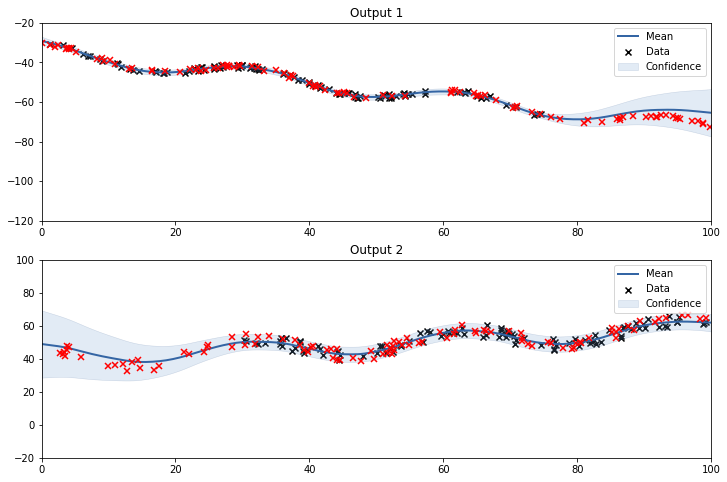

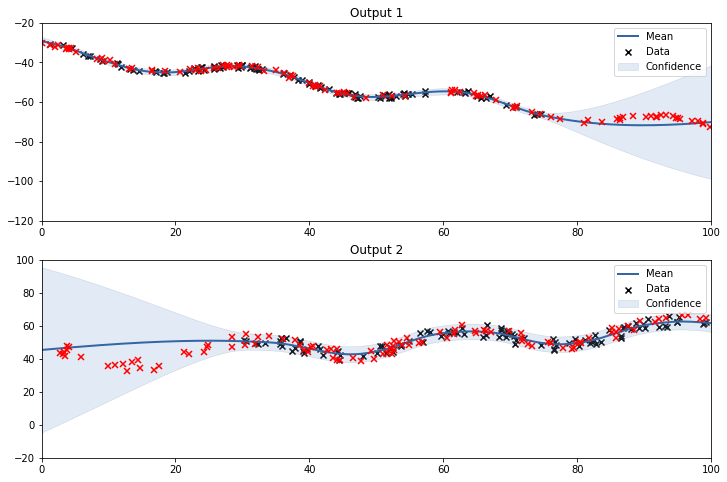

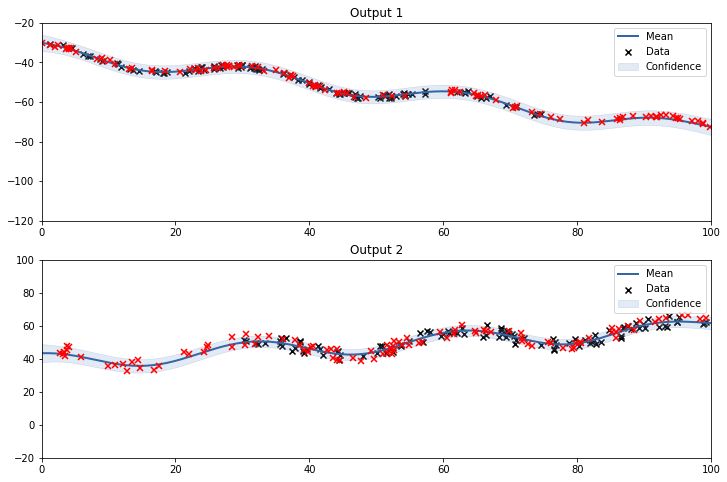

In [8]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

f_output1 = lambda x: 4*np.cos(x/5) - 0.4*x - 35 + np.random.rand(x.size) * 2
f_output2 = lambda x: 6*np.cos(x/5) + 0.2*x + 35 + np.random.rand(x.size) * 8

np.random.seed(seed=123)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
X1 = X1*75
X2 = X2*70 + 30
Y1 = f_output1(X1)
Y2 = f_output2(X2)

x_pred1 = np.random.rand(100)*100
x_pred2 = np.random.rand(100)*100
y_pred1 = f_output1(x_pred1)
y_pred2 = f_output2(x_pred2)

def plot_2outputs(m):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    ax1.set_ylim([-120, -20])
    ax1.set_title('Output 1')
    m.plot(plot_limits=[0, 100], fixed_inputs=[(1, 0)], which_data_rows=slice(0, 100), ax=ax1)
    ax1.plot(x_pred1, y_pred1, 'rx', mew=1.5)
    ax2 = fig.add_subplot(212)
    ax2.set_ylim([-20, 100])
    ax2.set_title('Output 2')
    m.plot(plot_limits=[0, 100], fixed_inputs=[(1, 1)], which_data_rows=slice(100, 200), ax=ax2)
    ax2.plot(x_pred2, y_pred2, 'rx', mew=1.5)


K = GPy.kern.Matern32(1)
B = GPy.kern.Coregionalize(input_dim=1, output_dim=2)
kernel = K**B
model = GPy.models.GPCoregionalizedRegression(X_list=[X1[:, None],X2[:, None]], Y_list=[Y1[:, None],Y2[:, None]], kernel=kernel)

model['.*Mat32.var'].constrain_fixed(1)
model.optimize()
plot_2outputs(model)

model['.*coregion.W'].constrain_fixed(0)
model.randomize()
model.optimize()
plot_2outputs(model)


K1 = GPy.kern.RBF(1)
K2 = GPy.kern.Bias(1) + GPy.kern.Linear(1)
B1 = GPy.kern.Coregionalize(1, output_dim=2)
B2 = GPy.kern.Coregionalize(1, output_dim=2)
kernel = K1**B1 + K2**B2

X = np.vstack((np.concatenate([X1, X2]), np.hstack((np.zeros(100), np.ones(100))))).T
Y = np.hstack((Y1, Y2))[:, None]
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()
plot_2outputs(model)


## prediction
x_pred = np.arange(100, 110)[:, None]
x_pred = np.hstack([x_pred, np.ones_like(x_pred)])
output_index_pred = {'output_index':x_pred[:,1:].astype(int)}
y_pred = model.predict(x_pred, Y_metadata=output_index_pred)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    01s05  0004   6.704851e+03   1.068261e+07 
    10s13  0024   1.383081e+03   1.510002e+06 
    20s07  0050  -2.424926e+03   1.227163e+05 
    49s35  0145  -5.137545e+03   3.843638e+04 
 01m20s37  0254  -6.281870e+03   1.086604e+04 
 03m45s82  0713  -6.706600e+03   1.205814e+03 
 10m29s49  1588  -6.770676e+03   7.145380e+02 
 13m08s55  1930  -6.772421e+03   1.164974e+01 
 17m26s36  2566  -6.772639e+03   7.714199e+00 
Runtime:  17m26s36
Optimization status: Converged



{'scatter': [<matplotlib.collections.PathCollection at 0x1244cd780>,
 'imshow': <matplotlib.image.AxesImage at 0x1244cd668>}

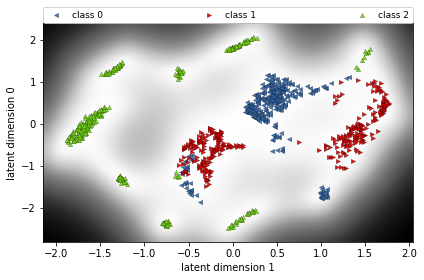

In [9]:
from scipy.io import loadmat
import scipy.io as spio
import GPy
import matplotlib.pyplot as plt

d = spio.loadmat('3Class.mat')
X = d['DataTrn']
X -= X.mean(0)
L = d['DataTrnLbls'].nonzero()[1]
input_dim = 2 # How many latent dimensions to use

kernel = GPy.kern.RBF(input_dim, ARD=True) + GPy.kern.Bias(input_dim) + GPy.kern.Linear(input_dim) + GPy.kern.White(input_dim)
model = GPy.models.BayesianGPLVM(X, input_dim, kernel=kernel, num_inducing=30)
model.optimize(messages=True, max_iters=5e3)
model.plot_latent(labels=L)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    02s28  0016   1.941436e+03   2.112879e+05 
    04s50  0032  -3.144407e+02   1.378732e+05 
    15s05  0112  -3.842149e+03   7.469390e+04 
    43s27  0330  -6.042376e+03   2.436821e+04 
 01m13s75  0554  -6.266970e+03   2.174862e+04 
 02m15s69  0996  -6.293389e+03   1.228831e+03 
 03m00s84  1341  -6.296920e+03   1.247268e+01 
 04m46s36  2145  -6.303169e+03   2.295255e-01 
 04m53s06  2195  -6.303171e+03   2.192877e+00 
Runtime:  04m53s06
Optimization status: Converged



{'scatter': [<matplotlib.collections.PathCollection at 0x1229243c8>,
 'imshow': <matplotlib.image.AxesImage at 0x122924e80>}

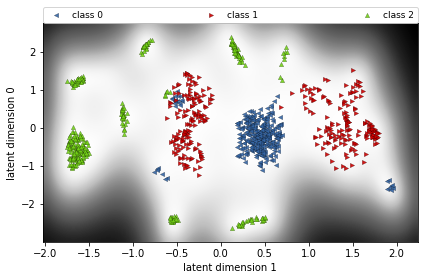

In [10]:
from scipy.io import loadmat
import scipy.io as spio
import GPy
import matplotlib.pyplot as plt

d = spio.loadmat('3Class.mat')
X = d['DataTrn']
X -= X.mean(0)
L = d['DataTrnLbls'].nonzero()[1]
input_dim = 2 # How many latent dimensions to use

kernel = GPy.kern.RBF(input_dim, ARD=True)
model = GPy.models.BayesianGPLVM(X, input_dim, kernel=kernel, num_inducing=30)
model.optimize(messages=True, max_iters=5e3)
model.plot_latent(labels=L)

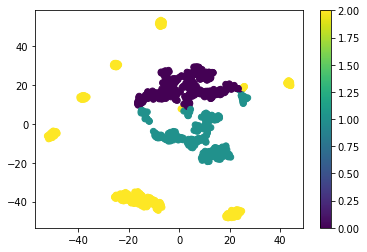

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=L)
plt.colorbar()